Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
import pickle
import sys

C:\Users\mokky\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mokky\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mokky\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mokky\AppData\Roaming\Python\Python37\site-

In [2]:
# Function to show various error measurement
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    #return({'mape':mape, 'me':me, 'mae': mae, 
    #        'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
    #        'corr':corr, 'minmax':minmax})
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse})

In [3]:
import os
os.chdir('d:/Users/mokky/Documents/GitHub/nus-iss/PRS-PM-ISY5002-GROUP5/SystemCode')
print(os.getcwd())

d:\Users\mokky\Documents\GitHub\nus-iss\PRS-PM-ISY5002-GROUP5\SystemCode


In [4]:
file_dir = './Data Exploration/data/uc3/'
X_train_file_path = 'all_hosp_new_train_X_uc3.pkl'
y_train_file_path = 'all_hosp_data_uc3_y_train_uc3.pkl'
X_test_file_path = 'all_hosp_new_test_X_uc3.pkl'
y_test_file_path = 'all_hosp_data_uc3_y_test_uc3.pkl'

In [5]:
df_X_train = pd.read_pickle(file_dir + X_train_file_path)
df_y_train = pd.read_pickle(file_dir + y_train_file_path)
df_X_test = pd.read_pickle(file_dir + X_test_file_path)
df_y_test = pd.read_pickle(file_dir + y_test_file_path)
print(df_X_train.shape, df_y_train.shape, df_X_test.shape, df_y_test.shape)

(46888, 14313) (46888,) (15629, 14313) (15629,)


Neural Networks ( Sequential )

In [6]:
NN_model = Sequential()

In [7]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = df_X_train.shape[1], activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [9]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [10]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1832192   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 1,997,057
Trainable params: 1,997,057
Non-trainable params: 0
_________________________________________________________________


In [11]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [12]:
NN_model.fit(df_X_train, df_y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

# save model to file
NN_model.save(file_dir + "uc3_NN_model.h5")

Train on 37510 samples, validate on 9378 samples
Epoch 1/100
37504/37510 [============================>.] - ETA: 0s - loss: 2512.3896 - mean_absolute_error: 2512.3901- ETA: 2s - 
Epoch 00001: val_loss improved from inf to 2072.18389, saving model to Weights-001--2072.18389.hdf5
37510/37510 [==============================] - 40s 1ms/sample - loss: 2512.1896 - mean_absolute_error: 2512.1899 - val_loss: 2072.1839 - val_mean_absolute_error: 2072.1838
Epoch 2/100
37472/37510 [============================>.] - ETA: 0s - loss: 1846.6370 - mean_absolute_error: 1846.6385
Epoch 00002: val_loss improved from 2072.18389 to 1918.46863, saving model to Weights-002--1918.46863.hdf5
37510/37510 [==============================] - 40s 1ms/sample - loss: 1845.6811 - mean_absolute_error: 1845.6827 - val_loss: 1918.4686 - val_mean_absolute_error: 1918.4692
Epoch 3/100
37472/37510 [============================>.] - ETA: 0s - loss: 1636.2617 - mean_absolute_error: 1636.2622
Epoch 00003: val_loss improved fro

Epoch 24/100
37504/37510 [============================>.] - ETA: 0s - loss: 597.9667 - mean_absolute_error: 597.9667
Epoch 00024: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 39s 1ms/sample - loss: 597.9780 - mean_absolute_error: 597.9780 - val_loss: 1952.6666 - val_mean_absolute_error: 1952.6671
Epoch 25/100
37504/37510 [============================>.] - ETA: 0s - loss: 586.2684 - mean_absolute_error: 586.2686
Epoch 00025: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 40s 1ms/sample - loss: 586.2004 - mean_absolute_error: 586.2006 - val_loss: 1960.7308 - val_mean_absolute_error: 1960.7313
Epoch 26/100
37504/37510 [============================>.] - ETA: 0s - loss: 571.5359 - mean_absolute_error: 571.5361
Epoch 00026: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 39s 1ms/sample - loss: 571.5384 - mean_absolute_error: 571.5386 - val_loss: 1950.0536 - val_mean_abs

Epoch 48/100
37504/37510 [============================>.] - ETA: 0s - loss: 409.7025 - mean_absolute_error: 409.7026
Epoch 00048: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 38s 1ms/sample - loss: 409.7570 - mean_absolute_error: 409.7570 - val_loss: 1930.0853 - val_mean_absolute_error: 1930.0856
Epoch 49/100
37504/37510 [============================>.] - ETA: 0s - loss: 409.6158 - mean_absolute_error: 409.6158
Epoch 00049: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 38s 1ms/sample - loss: 409.6170 - mean_absolute_error: 409.6170 - val_loss: 1949.7248 - val_mean_absolute_error: 1949.7247
Epoch 50/100
37504/37510 [============================>.] - ETA: 0s - loss: 398.9412 - mean_absolute_error: 398.9412
Epoch 00050: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 38s 1ms/sample - loss: 398.9156 - mean_absolute_error: 398.9156 - val_loss: 1941.4515 - val_mean_abs

Epoch 72/100
37472/37510 [============================>.] - ETA: 0s - loss: 335.3883 - mean_absolute_error: 335.3885
Epoch 00072: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 38s 1ms/sample - loss: 335.4336 - mean_absolute_error: 335.4337 - val_loss: 1943.0884 - val_mean_absolute_error: 1943.0879
Epoch 73/100
37472/37510 [============================>.] - ETA: 0s - loss: 327.7619 - mean_absolute_error: 327.7622
Epoch 00073: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 38s 1ms/sample - loss: 327.7230 - mean_absolute_error: 327.7233 - val_loss: 1964.7242 - val_mean_absolute_error: 1964.7242
Epoch 74/100
37504/37510 [============================>.] - ETA: 0s - loss: 328.4487 - mean_absolute_error: 328.4489
Epoch 00074: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 38s 1ms/sample - loss: 328.4257 - mean_absolute_error: 328.4259 - val_loss: 1947.7419 - val_mean_abs

Epoch 96/100
37472/37510 [============================>.] - ETA: 0s - loss: 287.4210 - mean_absolute_error: 287.4210
Epoch 00096: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 39s 1ms/sample - loss: 287.6692 - mean_absolute_error: 287.6693 - val_loss: 1947.0859 - val_mean_absolute_error: 1947.0853
Epoch 97/100
37504/37510 [============================>.] - ETA: 0s - loss: 282.3196 - mean_absolute_error: 282.3194
Epoch 00097: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 40s 1ms/sample - loss: 282.3228 - mean_absolute_error: 282.3226 - val_loss: 1958.4327 - val_mean_absolute_error: 1958.4325
Epoch 98/100
37472/37510 [============================>.] - ETA: 0s - loss: 280.7048 - mean_absolute_error: 280.7047
Epoch 00098: val_loss did not improve from 1887.73835
37510/37510 [==============================] - 40s 1ms/sample - loss: 280.7685 - mean_absolute_error: 280.7684 - val_loss: 1963.0847 - val_mean_abs

In [13]:
predictions = NN_model.predict(df_X_test)

C:\ProgramData\Anaconda3\envs\prpms\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


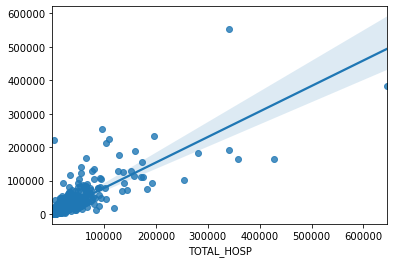

In [14]:
sns.regplot(df_y_test,predictions)

In [15]:
# MSE
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test,predictions, squared=True))

# RMSE
print('Root Mean squared error: %.2f'
      % mean_squared_error(df_y_test,predictions, squared=False))

# MAE
print('Mean absolute error: %.2f'
      % mean_absolute_error(df_y_test,predictions))

Mean squared error: 43082926.64
Root Mean squared error: 6563.76
Mean absolute error: 1932.66


In [17]:
forecast_accuracy(predictions.reshape((-1,)), df_y_test.values)

{'mape': 2.028495115732672,
 'me': -84.92661739301715,
 'mae': 6926.644246656469,
 'mpe': 1.4923061310775672,
 'mse': 281140626.6448241,
 'rmse': 16767.248630733193}